In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
mat = pd.read_csv("datasets/organic/student-mat.csv", delimiter=";")
por = pd.read_csv("datasets/organic/student-por.csv", delimiter=";")
main = pd.read_csv("datasets/organic/Student_performance_data _.csv")
factors = pd.read_csv("datasets/organic/StudentPerformanceFactors.csv")

In [143]:
print(mat.head())
print(por.head())
print(main.head())
print(factors.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [144]:
def missing_report(df, name):
    total = df.isnull().sum()
    percent = (total / len(df)) * 100
    missing_df = pd.DataFrame({'Column': df.columns, 'Missing': total, 'Percent': percent})
    missing_df = missing_df[missing_df['Missing'] > 0].sort_values(by='Missing', ascending=False)
    print(f"\nMissing value report for: {name}")
    display(missing_df)

for df, name in zip([por, mat, main, factors], ["por", "mat", "main", "factors"]):
    missing_report(df, name)
#This code generates and displays a missing value report for each dataset (por, mat, main, factors).
#It shows which columns have missing values, how many, and what percentage of the total they represent.


Missing value report for: por


,Column,Missing,Percent



Missing value report for: mat


,Column,Missing,Percent



Missing value report for: main


,Column,Missing,Percent



Missing value report for: factors


,Column,Missing,Percent
Parental_Education_Level,Parental_Education_Level,90,1.362192
Teacher_Quality,Teacher_Quality,78,1.180566
Distance_from_Home,Distance_from_Home,67,1.014076


In [145]:
def fill_missing(df):
    for col in df.columns:
        if df[col].dtype in ["float64", "int64"]:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    return df

factors = fill_missing(factors)
factors.isnull().sum().sum()
#This code fills in missing values in the factors dataset by replacing numerical columns 
#with their mean and categorical columns with their most frequent value (mode).

np.int64(0)

In [146]:
drop_cols = ['school', 'reason', 'traveltime', 'Walc', 'Dalc']

por.drop(columns=drop_cols, inplace=True)
mat.drop(columns=drop_cols, inplace=True)
por.head()
#This code removes some columns from the por and mat datasets. 
#Reasoning for the removal of these columns can be found on github page, under preprocessing title on readme file.

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,mother,...,no,no,4,3,4,3,4,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,father,...,yes,no,5,3,3,3,2,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,mother,...,yes,no,4,3,2,3,6,12,13,12
3,F,15,U,GT3,T,4,2,health,services,mother,...,yes,yes,3,2,2,5,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,father,...,no,no,4,3,2,5,0,11,13,13


In [147]:
binary_map = {
    'yes': 1, 'no': 0,
    'F': 0, 'M': 1,
    'U': 1, 'R': 0,
    'GT3': 1, 'LE3': 0,
    'T': 1, 'A': 0
}

binary_cols = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 
               'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    por[col] = por[col].map(binary_map)
    mat[col] = mat[col].map(binary_map)

nominal_cols = ['Mjob', 'Fjob', 'guardian']

por = pd.get_dummies(por, columns=nominal_cols, drop_first=True)
mat = pd.get_dummies(mat, columns=nominal_cols, drop_first=True)
#This code converts binary categorical values in the por and mat datasets into numeric form (0 or 1),
#and encodes nominal categorical columns using one-hot encoding.

In [148]:
main.drop('StudentID', axis=1, inplace=True)

ethnicity_dummies = pd.get_dummies(main['Ethnicity'], prefix='ethnicity', drop_first=False)
ethnicity_dummies = ethnicity_dummies.astype(int)
main.drop('Ethnicity', axis=1, inplace=True)
main = pd.concat([main, ethnicity_dummies], axis=1)

main['GradeClass'] = 4 - main['GradeClass']
#This code removes the StudentID column, one-hot encodes the Ethnicity column,
#and reverses the GradeClass scale so that higher numbers represent better grades.

In [149]:
ordinal_map = {'Low': 0, 'Medium': 1, 'High': 2}
factors['Parental_Involvement'] = factors['Parental_Involvement'].map(ordinal_map)
factors['Access_to_Resources'] = factors['Access_to_Resources'].map(ordinal_map)
factors['Motivation_Level'] = factors['Motivation_Level'].map(ordinal_map)
factors['Family_Income'] = factors['Family_Income'].map(ordinal_map)
factors['Teacher_Quality'] = factors['Teacher_Quality'].map(ordinal_map)

education_map = {'High School': 0, 'College': 1, 'Postgraduate': 2}
factors['Parental_Education_Level'] = factors['Parental_Education_Level'].map(education_map)

distance_map = {'Near': 0, 'Moderate': 1, 'Far': 2}
factors['Distance_from_Home'] = factors['Distance_from_Home'].map(distance_map)

binary_map = {'Yes': 1, 'No': 0, 'Male': 0, 'Female': 1}
binary_cols = ['Extracurricular_Activities', 'Internet_Access', 
               'Learning_Disabilities', 'Gender']
for col in binary_cols:
    factors[col] = factors[col].map(binary_map)

factors = pd.get_dummies(factors, columns=['School_Type', 'Peer_Influence'], drop_first=True)
#This code converts ordinal and binary categorical columns in the factors dataset into 
#numeric values using custom mappings,
#and applies one-hot encoding to nominal columns.

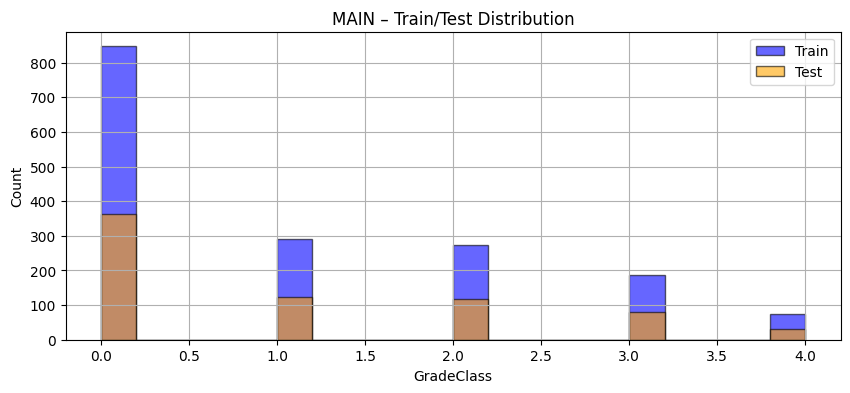

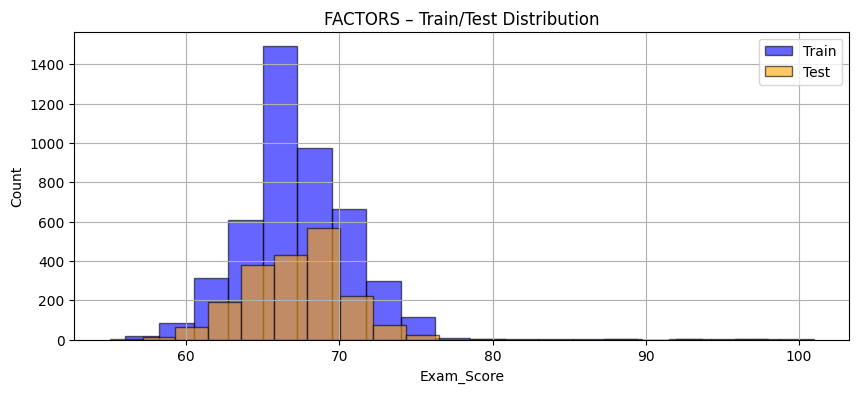

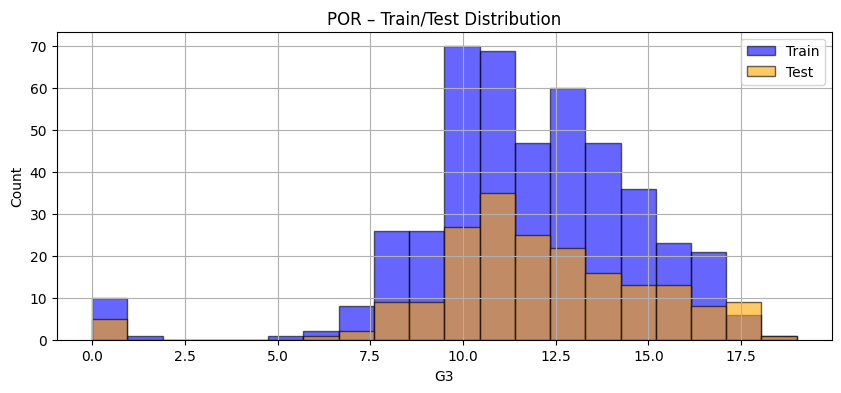

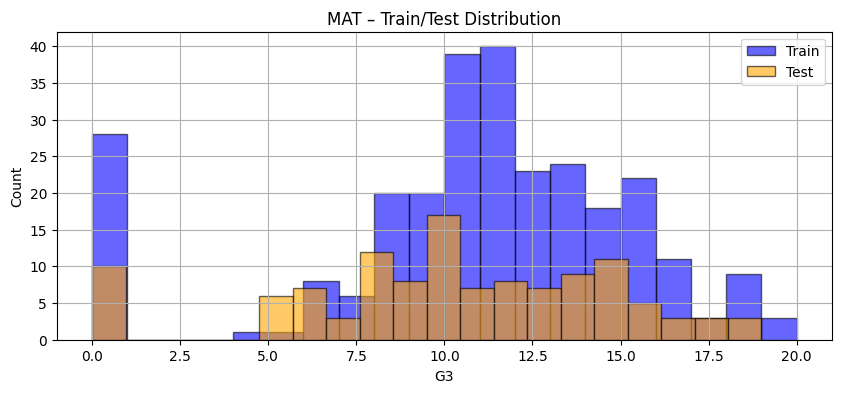

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os

save_path = "datasets/processed"
os.makedirs(save_path, exist_ok=True)

def plot_distribution(train, test, target, title):
    plt.figure(figsize=(10, 4))
    plt.hist(train[target], bins=20, alpha=0.6, label="Train", color="blue", edgecolor="black")
    plt.hist(test[target], bins=20, alpha=0.6, label="Test", color="orange", edgecolor="black")
    plt.title(f"{title} – Train/Test Distribution")
    plt.xlabel(target)
    plt.ylabel("Count")
    plt.legend()
    plt.grid(True)
    plt.show()

def split_save_plot(df, target_col, prefix, stratify=False):
    stratify_vals = df[target_col] if stratify else None

    train_df, test_df = train_test_split(
        df,
        test_size=0.3,
        random_state=42,
        stratify=stratify_vals
    )

    
    train_df.to_csv(os.path.join(save_path, f"{prefix}_train.csv"), index=False)
    test_df.to_csv(os.path.join(save_path, f"{prefix}_test.csv"), index=False)

    
    plot_distribution(train_df, test_df, target_col, prefix.upper())




split_save_plot(main, "GradeClass", "main", stratify=True)

split_save_plot(factors, "Exam_Score", "factors")

split_save_plot(por, "G3", "por")

split_save_plot(mat, "G3", "mat")

#This code splits each dataset into training and test sets, saves them as CSV files, 
#and visualizes the distribution of the target variable in both sets using histograms. 
#It uses stratified sampling for the classification task in the main dataset.